# Libraries

In [1]:
import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn

import Data.genData as genData

# Load Data

16
17
18
19


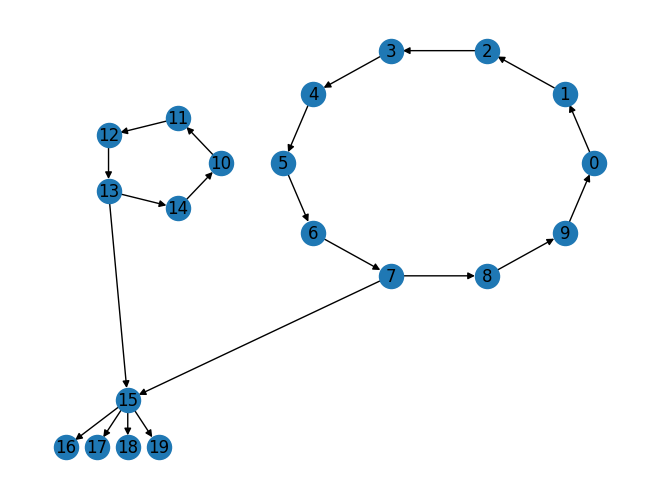

In [2]:
genData.genData()

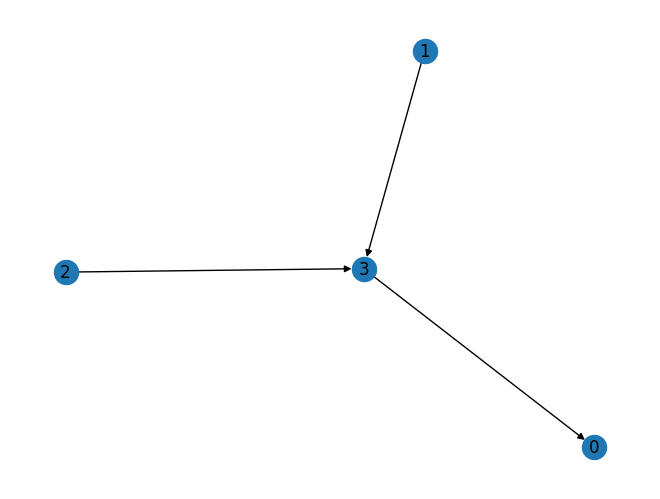

In [58]:
A = np.array([[0,0,0,0],
              [0,0,0,1],
              [0,0,0,1],
              [1,0,0,0]])

G = nx.DiGraph(A) # create graph from adjacency matrix  
    #pos = nx.spectral_layout(G)
nx.draw(G,  with_labels=True) # draw graph

In [60]:


nconn= np.sum(A, axis=0)
nconn[nconn==0] = 1
print(nconn)
x0 = np.array([0,1,0,0], dtype=float)
samples= 8
timeseries = np.zeros((4,samples*2))
timeseries[:,0] = x0    
for i in range(1,2*samples-1,2):

    print(i)

    x1 = A.T@x0


    x1 = x1/nconn

    x_inter = np.zeros_like(x1)
    x_inter[x0==1] = 0.5
    x_inter[x1==1] = 0.5
    #x1[x0==1] = 0.5
    
    timeseries[:,i] = x_inter

    timeseries[:,i+1] = x1

    #i = i+2

    x0 = x1

print(timeseries)

[1 1 1 2]
1
3
5
7
9
11
13
[[0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [17]:
x0 = np.array([0, 1, 1, 0, 1])
x1 = np.array([0.2, 0.3, 0.4, 0.5, 0.6])

# Set x1 to 0.5 where x0 is 1
x1[x0 == 1] = 0.5

print(x1)

[0.2 0.5 0.5 0.5 0.5]


In [3]:
cfg = OmegaConf.load("config.yaml")
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)
print(OmegaConf.to_yaml(cfg))

seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.2
  train_size: 0.6
  val_size: 0.2
  num_workers: 2
loss: MSE
--ip: 127.0.0.1
--stdin: 9003
--control: 9001
--hb: 9000
--Session:
  signature_scheme: hmac-sha256
  key: b"6dfbeaf8-8ca9-456c-95aa-4ed815aa3643"
--shell: 9002
--transport: tcp
--iopub: 9004
--f: c:\Users\aleja\AppData\Roaming\jupyter\runtime\kernel-v2-27684ntbbUtHaOhhW.json



In [4]:
timeseries = np.random.rand(10, 1000)

train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'pearson')

X_train shape:  (10, 600)
X_val shape:  (10, 200)
X_test shape:  (10, 200)


In [5]:
window = 20
model = models.Net(window, 1, 32)

lossfn = loss_func.getLoss()

import torch

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model, train_losses, val_losses, accuracy_list  = train.train(model, train_loader, val_loader, optimizer)

Using device: cuda
cuda
epoch: 10 	 training loss: 0.0913921371102333 	 validation loss: 0.09164053450028102 	 accuracy : 1.0
epoch: 20 	 training loss: 0.08427994847297668 	 validation loss: 0.08802614609400432 	 accuracy : 1.0
epoch: 30 	 training loss: 0.08320077955722809 	 validation loss: 0.08717924853165944 	 accuracy : 1.0
epoch: 40 	 training loss: 0.08270588964223861 	 validation loss: 0.08691712468862534 	 accuracy : 1.0
epoch: 50 	 training loss: 0.08203744292259216 	 validation loss: 0.08701071639855702 	 accuracy : 1.0
epoch: 60 	 training loss: 0.08128923922777176 	 validation loss: 0.08710360775391261 	 accuracy : 1.0
epoch: 70 	 training loss: 0.08118516057729722 	 validation loss: 0.08663844068845113 	 accuracy : 1.0
epoch: 80 	 training loss: 0.07803757935762405 	 validation loss: 0.08683341989914577 	 accuracy : 1.0
epoch: 90 	 training loss: 0.07862376794219017 	 validation loss: 0.08672190705935161 	 accuracy : 1.0
epoch: 100 	 training loss: 0.07773647010326386 	 